In [52]:
data['radius_mean']=data['radius_mean'].astype(int)
data['texture_mean']=data['texture_mean'].astype(int)
data['perimeter_mean']=data['perimeter_mean'].astype(int)
data['smoothness_mean']=data['smoothness_mean'].astype(int)
data['area_mean']=data['area_mean'].astype(int)


In [54]:
data['compactness_mean']=data['compactness_mean'].astype(int)
data['concavity_mean']=data['concavity_mean'].astype(int)
data['concave points_mean']=data['concave points_mean'].astype(int)
data['symmetry_mean']=data['symmetry_mean'].astype(int)
data['fractal_dimension_mean']=data['fractal_dimension_mean'].astype(int)
data['radius_se']=data['radius_se'].astype(int)
data['texture_se']=data['texture_se'].astype(int)
data['perimeter_se']=data['perimeter_se'].astype(int)
data['area_se']=data['area_se'].astype(int)
data['smoothness_se']=data['smoothness_se'].astype(int)


In [57]:

data['texture_worst']=data['texture_worst'].astype(int)
data['perimeter_worst']=data['perimeter_worst'].astype(int)
data['area_worst']=data['area_worst'].astype(int)
data['smoothness_worst']=data['smoothness_worst'].astype(int)
data['compactness_worst']=data['compactness_worst'].astype(int)
data['concavity_worst']=data['concavity_worst'].astype(int)

data['concave points_worst']=data['concave points_worst'].astype(int)
data['symmetry_worstsymmetry_worst']=data['symmetry_worst'].astype(int)
data['fractal_dimension_worst']=data['fractal_dimension_worst'].astype(int)

In [58]:
data['compactness_se']=data['compactness_se'].astype(int)
data['concavity_se']=data['concavity_se'].astype(int)
data['concave points_se']=data['concave points_se'].astype(int)
data['symmetry_se']=data['symmetry_se'].astype(int)
data['fractal_dimension_se']=data['fractal_dimension_se'].astype(int)
data['radius_worst']=data['radius_worst'].astype(int)


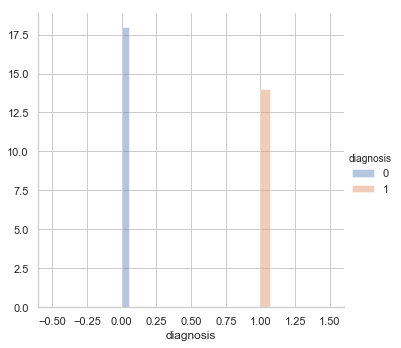

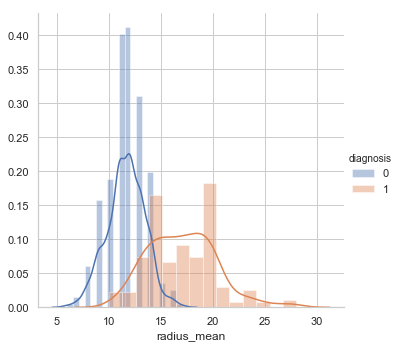

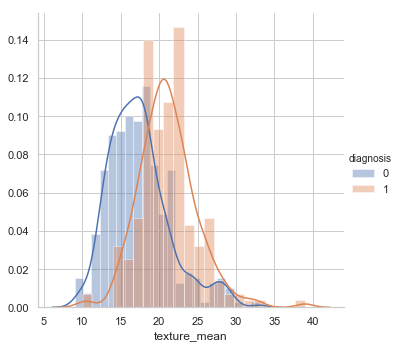

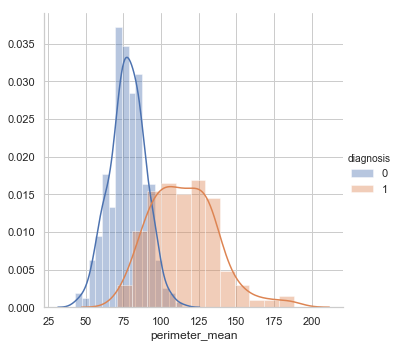

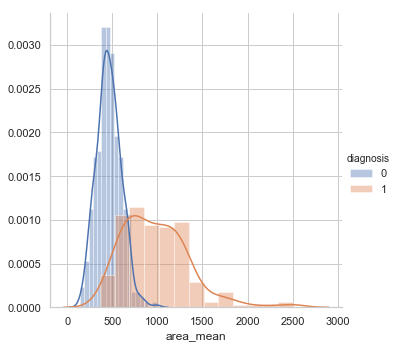

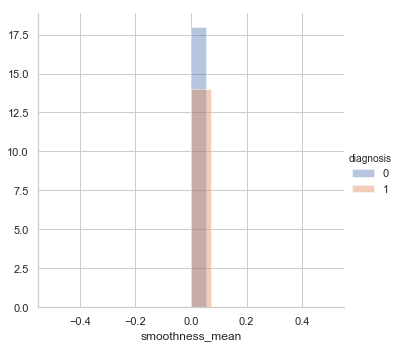

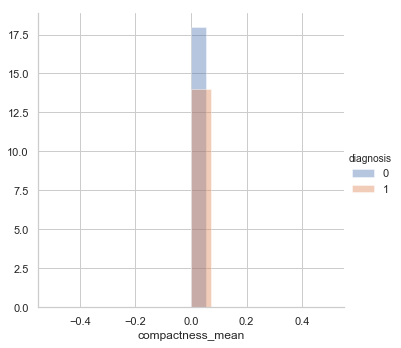

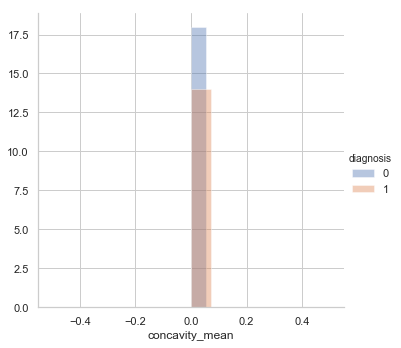

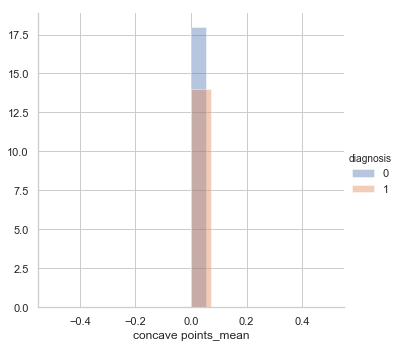

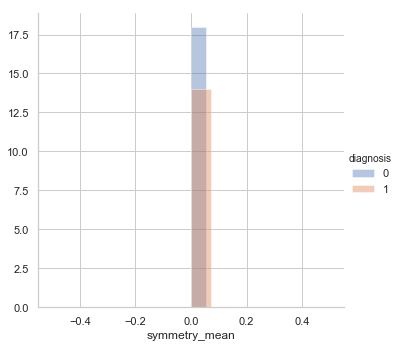

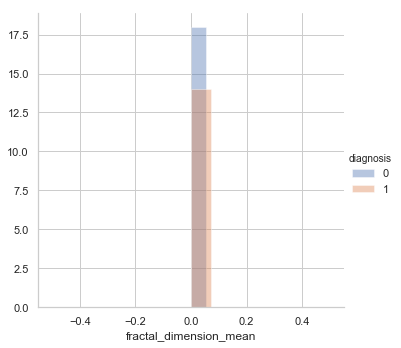

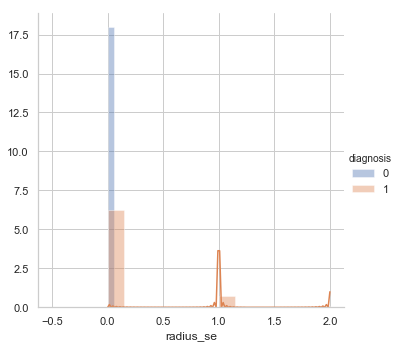

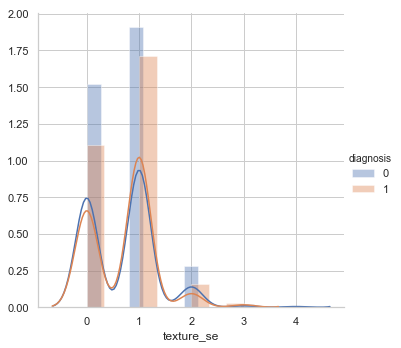

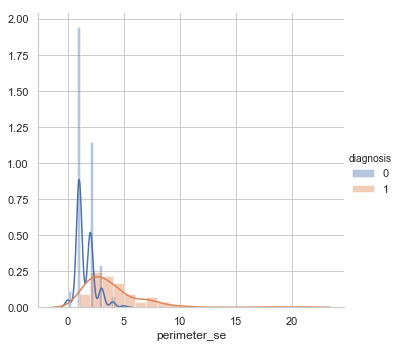

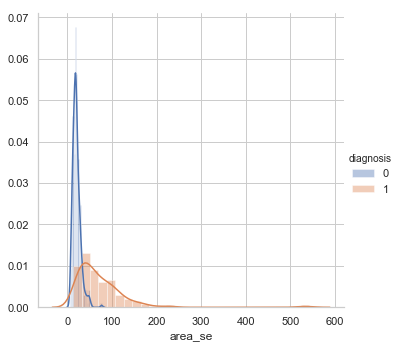

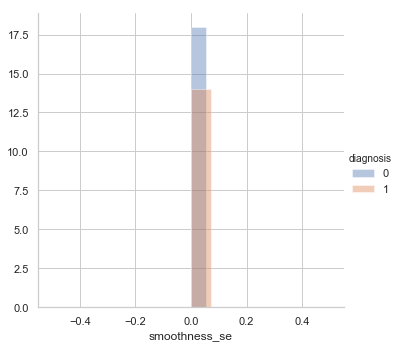

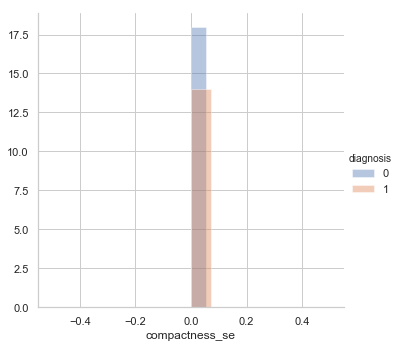

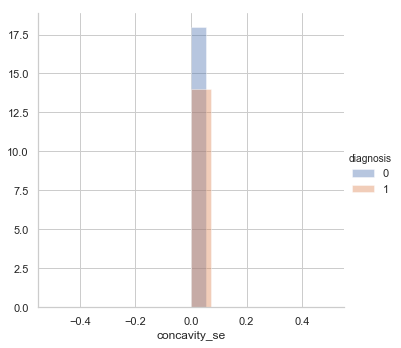

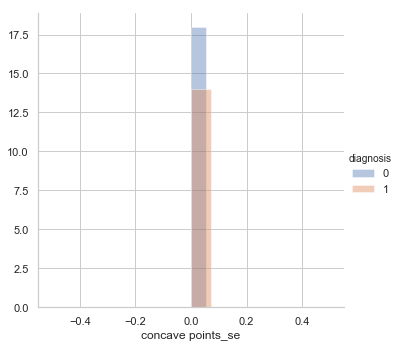

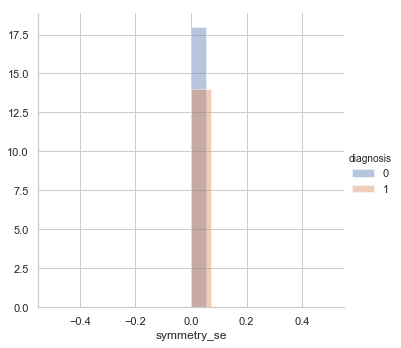

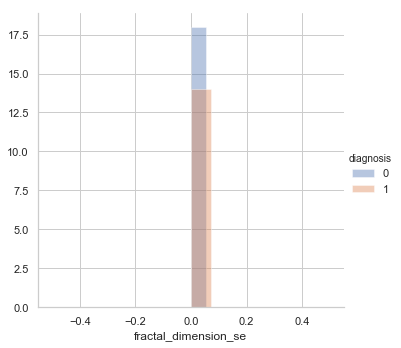

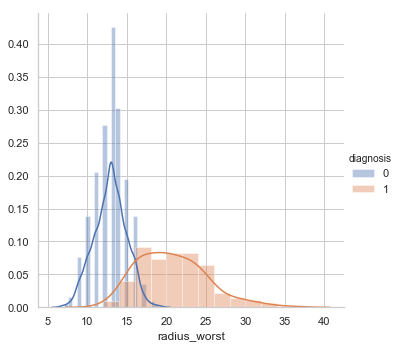

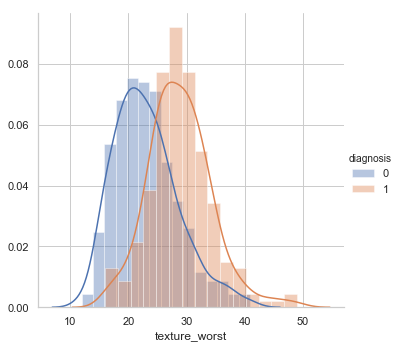

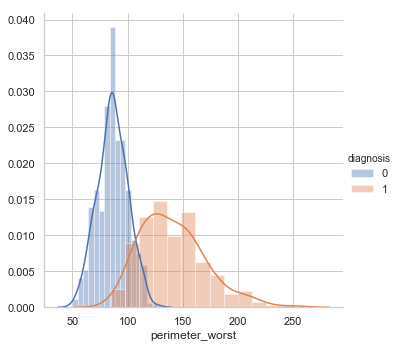

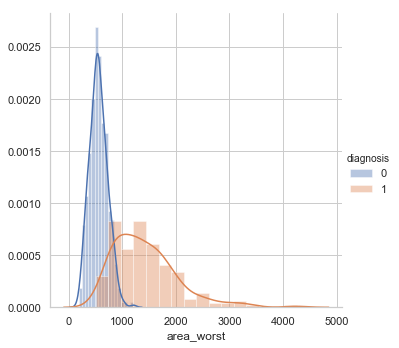

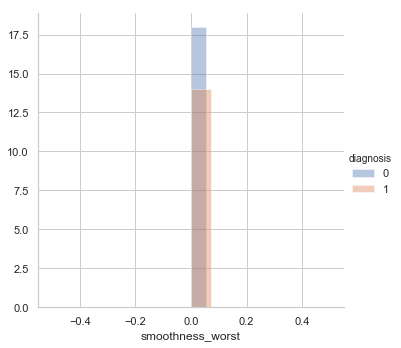

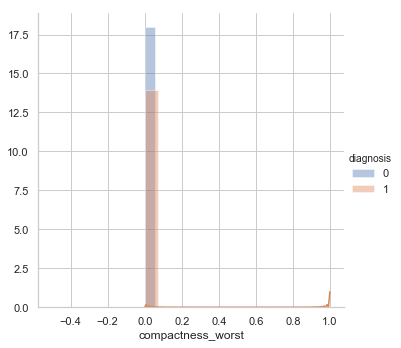

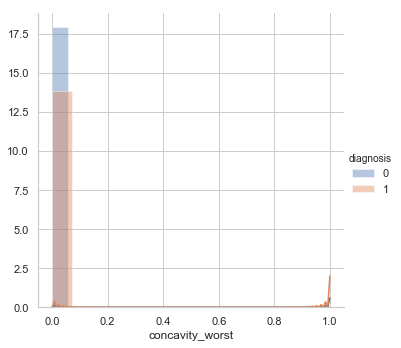

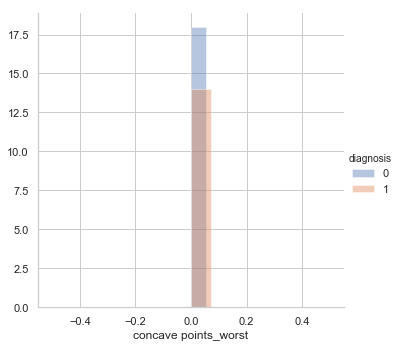

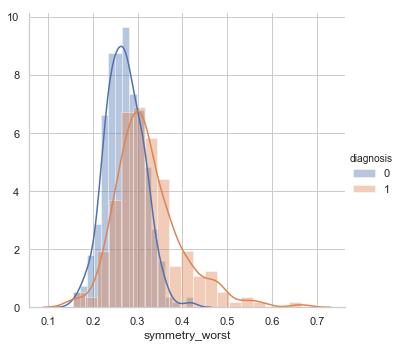

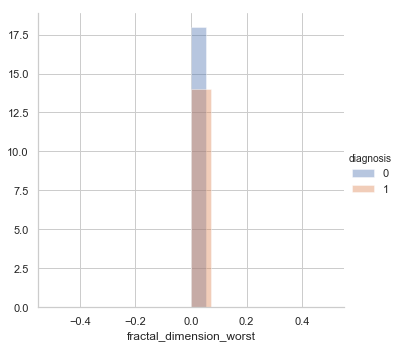

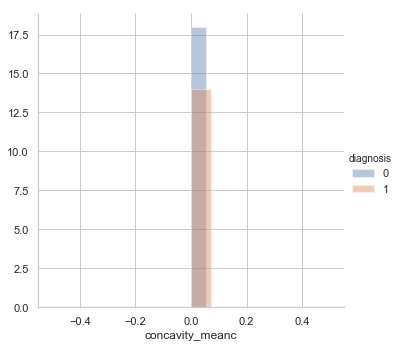

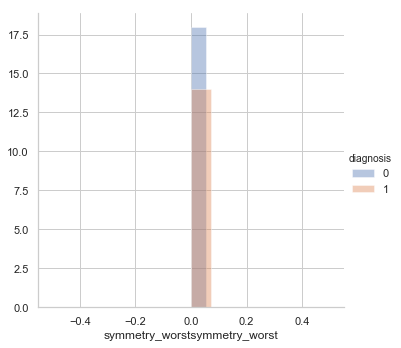

In [59]:
for ajha, feature in enumerate(list(data.columns)):
    fg = sns.FacetGrid(data, hue='diagnosis', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

In [19]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [40]:
from sklearn.preprocessing import StandardScaler
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = data.loc[:, features].values
y= data.loc[:, ['diagnosis']].values
X = StandardScaler().fit_transform(X)
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [44]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
datapca = pd.DataFrame(data = X, columns = ['principal component 1' , 'principal component 2'])



In [45]:
final  =pd.concat([datapca, data[['diagnosis']]], axis = 1)

In [46]:
final.head()

,principal component 1,principal component 2,diagnosis
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


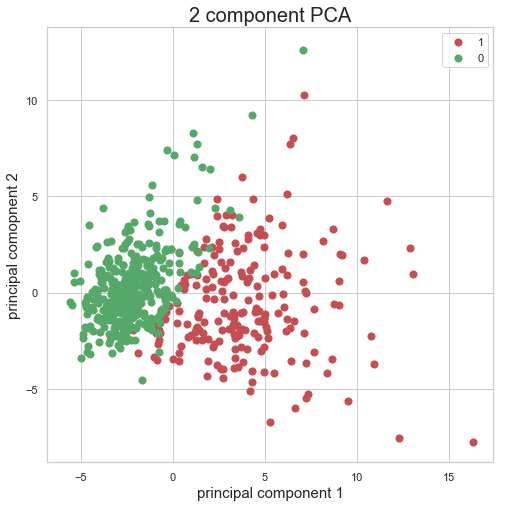

In [58]:
import matplotlib.pyplot as plt
#%motplotlib inline 
#sns.set(color_codes-True)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1' , fontsize = 15)
ax.set_ylabel('principal comopnent 2' , fontsize = 15)
ax.set_title('2 component PCA' , fontsize = 20)
targets = [1 , 0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final['diagnosis'] == target
    ax.scatter(final.loc[indicesToKeep, 'principal component 1']
              , final.loc[indicesToKeep, 'principal component 2'] 
              , c = color,
               s = 50)
    ax.legend(targets)
    ax.grid() 
                            
                            

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [61]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', 
                                    min_samples_leaf = 5,
                                    min_samples_split = 5,
                                    random_state =0 )
tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [62]:
y_pred = tree.predict(X_test)


In [63]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [64]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
pred=tree.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pred))

[[84  6]
 [ 4 49]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        90
           1       0.89      0.92      0.91        53

   micro avg       0.93      0.93      0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



Accuracy score is:  0.9300699300699301
